In [1]:
import numpy as np
from sklearn import svm

In [37]:
data_x = [(4.9, 3.3), (5.6, 4.5), (6.4, 4.3), (6.7, 5.7), (6.3, 5.0), (5.2, 3.9), (5.5, 3.7), (5.6, 3.6), (5.5, 3.8), (6.1, 4.7), (7.4, 6.1), (6.0, 5.1), (5.5, 4.4), (5.9, 5.1), (6.5, 5.8), (6.5, 4.6), (6.7, 4.4), (6.3, 5.6), (5.9, 4.8), (6.0, 4.5), (5.6, 4.1), (5.6, 4.9), (4.9, 4.5), (6.2, 4.5), (6.1, 4.7), (6.1, 4.9), (6.2, 5.4), (5.7, 4.2), (6.1, 5.6), (5.8, 4.0), (6.6, 4.6), (5.6, 4.2), (7.2, 6.1), (7.7, 6.7), (5.6, 3.9), (7.7, 6.9), (6.0, 4.0), (6.1, 4.0), (7.6, 6.6), (5.1, 3.0), (6.3, 6.0), (6.7, 5.7), (6.8, 5.9), (6.4, 5.5), (7.0, 4.7), (5.8, 5.1), (5.8, 5.1), (6.4, 5.3), (6.3, 4.9), (6.4, 5.3), (5.7, 3.5), (7.2, 5.8), (6.4, 5.6), (5.7, 4.5), (6.0, 4.5), (7.7, 6.1), (6.2, 4.3), (7.1, 5.9), (7.3, 6.3), (5.0, 3.3), (6.3, 5.1), (5.8, 3.9), (6.4, 4.5), (6.3, 5.6), (6.8, 5.5), (6.9, 5.4), (5.5, 4.0), (5.7, 4.1), (6.5, 5.5), (6.3, 4.7), (5.0, 3.5), (6.7, 5.8), (6.9, 4.9), (7.7, 6.7), (5.8, 4.1), (6.4, 5.6), (6.7, 5.2), (6.7, 4.7), (5.4, 4.5), (6.8, 4.8), (5.7, 4.2), (5.5, 4.0), (6.3, 4.9), (6.5, 5.2), (5.8, 5.1), (6.0, 4.8), (6.2, 4.8), (6.5, 5.1), (7.9, 6.4), (6.7, 5.0), (6.7, 5.6), (6.0, 5.0), (6.1, 4.6), (5.7, 5.0), (7.2, 6.0), (6.3, 4.4), (5.9, 4.2), (6.9, 5.1), (6.6, 4.4), (6.9, 5.7)]
data_y = [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1]

x_train = np.array([[1] + list(x) for x in data_x])
y_train = np.array(data_y)

# clf = svm.SVC(kernel='linear')
# clf.fit(x_train, y_train)

lin_clf = svm.LinearSVC()  # SVM для линейно разделимой выборки (используется для получения вектора w)
lin_clf.fit(x_train, y_train) # нахождение вектора w по обучающей выборке

v = clf.support_vectors_ # выделим опорные вектора
w = lin_clf.coef_[0] # коэф-ы линейной модели
# print(w, v, sep='\n')

w[0] *= w[2]

a = lambda w, x: np.sign(np.dot(w, x))
Q = sum([y != a(w, x) for y, x in zip(y_train, x_train)])
Q

np.int64(6)

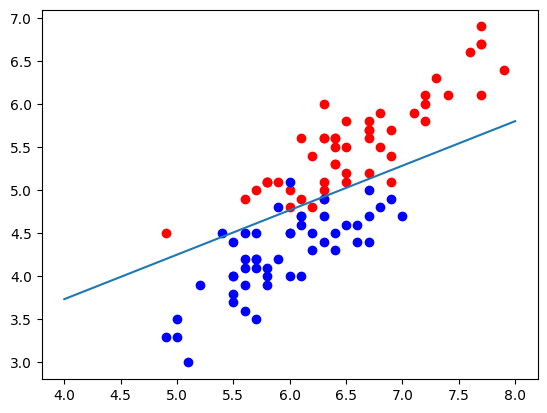

In [38]:
# make visualisation
import matplotlib.pyplot as plt
x_train = np.array(x_train)
line_x = list(range(int(min(x_train[:, 1])), int(max(x_train[:, 1])) + 2))
line_y = [-x * w[1] / w[2] - w[0] / w[2] for x in line_x]
plt.scatter(x_train[y_train==1][:, 1], x_train[y_train==1][:, 2], c='r')
plt.scatter(x_train[y_train==-1][:, 1], x_train[y_train==-1][:, 2], c='b')
# plt.scatter(v[:, 1], v[:, 2], s=70, edgecolor=None, linewidths=0, marker='s')
plt.plot(line_x, line_y)

In [51]:
import numpy as np
from sklearn import svm

data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

# обучающая выборка в формате [1, x1, x2]
x_train = np.array([[1] + list(x) for x in data_x]) # входные образы
y_train = np.array(data_y) # целевые значения (метки классов)

clf = svm.SVC(kernel='linear')
clf.fit(data_x, data_y)

w12 = clf.coef_[0]
w0 = clf.intercept_[0]
w = [w0, *w12]
v_support = clf.support_vectors_

a = lambda w, x: np.sign(np.dot(w, x))
Q = sum([a(w, x) != y for x, y in zip(x_train, y_train)])
Q

np.int64(6)

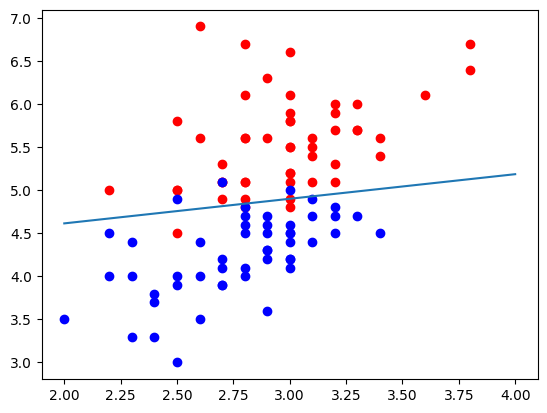

In [52]:
x_train = np.array(x_train)
line_x = list(range(int(min(x_train[:, 1])), int(max(x_train[:, 1])) + 2))
line_y = [-x * w[1] / w[2] - w[0] / w[2] for x in line_x]
plt.scatter(x_train[y_train==1][:, 1], x_train[y_train==1][:, 2], c='r')
plt.scatter(x_train[y_train==-1][:, 1], x_train[y_train==-1][:, 2], c='b')
# plt.scatter(v[:, 1], v[:, 2], s=70, edgecolor=None, linewidths=0, marker='s')
plt.plot(line_x, line_y)

In [72]:
import numpy as np
from sklearn import svm

def func(x):
    return np.sin(0.5*x) + 0.2 * np.cos(2*x) - 0.1 * np.sin(4 * x) - 2.5


def model(w, x):
    return w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3 + w[4] * np.cos(x) + w[5] * np.sin(x)


# обучающая выборка
coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

x_train = np.array([[x, x**2, x**3, np.cos(x), np.sin(x)] for x in coord_x])
y_train = coord_y

svr = svm.SVR(kernel='linear')
svr.fit(x_train, y_train)

w1 = svr.coef_[0] # w1, w2, ...
w0 = svr.intercept_[0]
w = [w0, *w1]

Q = np.mean([(model(w, x) - y) ** 2 for x, y in zip(coord_x, coord_y)])
Q

np.float64(0.02498863412706549)

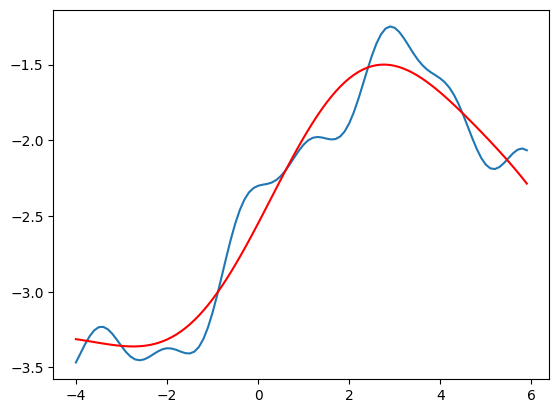

In [71]:
plt.plot(coord_x, coord_y)
x_line = coord_x
y_line = [model(w, x) for x in x_line]
plt.plot(x_line, y_line, c='r')